In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

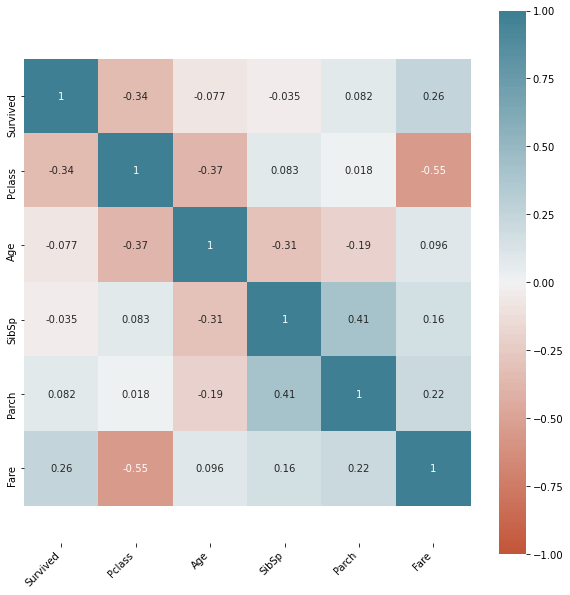

In [8]:
# Correlation of the features
corr = df.corr()

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

#As it's seen: It only shows integer or floating type variables. 
#That's why it can be usefull to transform object columns to integer.

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df_subset = df[['SibSp','Survived']]
df_subset = df_subset.loc[df['SibSp']==0]
df_subset.value_counts()

SibSp  Survived
0      0           398
       1           210
dtype: int64

<h1><center>----------------Logistic Regression----------------</center></h1>


## Select columns for X and y

In [12]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'Age', 'Fare','Embarked']]

In [13]:
X.head()

,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,
1,3,male,22.0,7.2500,S
2,1,female,38.0,71.2833,C
3,3,female,26.0,7.9250,S
4,1,female,35.0,53.1000,S
5,3,male,35.0,8.0500,S


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## The Pipeline

In [15]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         132
Fare          0
Embarked      2
dtype: int64

In [16]:
## The Pipeline

#Embarked -> SimpleImputer(Most_frequent), OneHotEncoder
#Age -> SimpleImputer(strategy=mean)
#Sex ->OneHotEncoder
#Pclass -> OneHotEncoder

impute_and_one_hot = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder()
)

## The ColumnTransformer

In [17]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,
299,1,male,NaN,30.5000,S
885,3,male,25.00,7.0500,S
248,2,female,24.00,14.5000,S
479,3,male,22.00,7.5208,S
306,1,male,0.92,151.5500,S


In [18]:
fe = ColumnTransformer([
    # (name, transformer, column-names)
    ('one-hot-encode', OneHotEncoder(), ['Pclass','Sex']),
    # ('do-nothing', 'passthrough', ['culmen_length_mm', 'body_mass_g']),
    # ('scaling', MinMaxScaler(), ['Fare']),
    ('impute', SimpleImputer(strategy='mean'), ['Age']),
    #('binning', KBinsDiscretizer(n_bins=3, encode='onehot-dense'), ['Age']),
    ('imputes-and-one-hot', impute_and_one_hot, ['Embarked']),
])

In [19]:
# fit the column transformer on the training data
# learn the min, max of the data for scaling
# learn the most frequent value for imputation
fe.fit(X_train)

# transform the training data
X_train_trans = fe.transform(X_train)
pd.DataFrame(X_train_trans)

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,1.0,29.421343,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,25.000000,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,24.000000,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,22.000000,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.920000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
663,0.0,0.0,1.0,1.0,0.0,21.000000,0.0,0.0,1.0
664,1.0,0.0,0.0,0.0,1.0,29.421343,0.0,0.0,1.0
665,0.0,0.0,1.0,0.0,1.0,41.000000,0.0,0.0,1.0
666,1.0,0.0,0.0,1.0,0.0,14.000000,0.0,0.0,1.0


## Fit the LogisticRegression model on the (transformed) training data

In [20]:
# initialize the model
m_logreg = LogisticRegression(max_iter=10000)

# fit the model on the transformed training data
m_logreg.fit(X_train_trans, y_train)

LogisticRegression(max_iter=10000)

## Evaluate the model on the (transformed) validation data

In [21]:
y_pred_train = m_logreg.predict(X_train_trans)
accuracy_score(y_train, y_pred_train)

0.7979041916167665

In [22]:
# transform the test data
X_test_trans = fe.transform(X_test)

# calculate predictions with the transformed test data
y_pred_test = m_logreg.predict(X_test_trans)

# calculate an accuracy score
accuracy_score(y_test, y_pred_test)

0.7847533632286996

## Confusion Matrix

In [23]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[110,  24],
       [ 24,  65]])

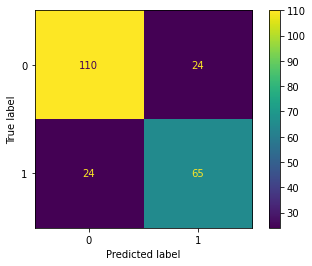

In [27]:
metrics.plot_confusion_matrix(m_logreg, X_test_trans, y_test)
plt.savefig('./pictures/confusion_matrix.png', dpi=400)

In [26]:
print('accuracy:    ', metrics.accuracy_score(y_test, y_pred_test))
print('precision:   ', metrics.precision_score(y_test, y_pred_test))
print('recall:      ', metrics.recall_score(y_test, y_pred_test))

accuracy:     0.7847533632286996
precision:    0.7303370786516854
recall:       0.7303370786516854


In [28]:
acc_logreg = metrics.accuracy_score(y_test, y_pred_test)
pre_logreg = metrics.precision_score(y_test, y_pred_test)
rec_logreg = metrics.recall_score(y_test, y_pred_test)

<h1><center>----------------DecisionTrees----------------</center></h1>


## Fit the DecisionTree model on the (transformed) training data

In [29]:
# initialize and train model
m_tree = DecisionTreeClassifier(max_depth=3)
m_tree.fit(X_train_trans, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred_train = m_tree.predict(X_train_trans)

In [31]:
# take a look at the probabilities 
pd.DataFrame(m_tree.predict_proba(X_train_trans), columns=m_tree.classes_)

,0,1
0,0.666667,0.333333
1,0.880240,0.119760
2,0.025424,0.974576
3,0.880240,0.119760
4,0.000000,1.000000
...,...,...
663,0.619718,0.380282
664,0.666667,0.333333
665,0.880240,0.119760
666,0.025424,0.974576


In [32]:
accuracy_score(y_train, y_pred_train)

0.8263473053892215

## Evaluate the DecisionTree model on the (transformed) Validation data

In [33]:
# transform the test data
X_test_trans = fe.transform(X_test)

# calculate predictions with the transformed test data
y_pred_test = m_tree.predict(X_test_trans)

# calculate an accuracy score
accuracy_score(y_test, y_pred_test)

0.8116591928251121

## Confusion Matrix

In [34]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[123,  11],
       [ 31,  58]])

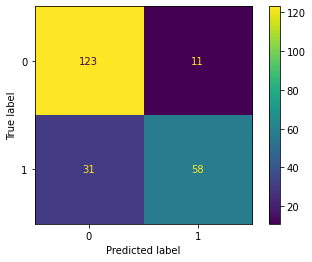

In [35]:
metrics.plot_confusion_matrix(m_tree, X_test_trans, y_test)

In [36]:
print('accuracy:    ', metrics.accuracy_score(y_test, y_pred_test))
print('precision:   ', metrics.precision_score(y_test, y_pred_test))
print('recall:      ', metrics.recall_score(y_test, y_pred_test))

accuracy:     0.8116591928251121
precision:    0.8405797101449275
recall:       0.651685393258427


In [37]:
acc_tree = metrics.accuracy_score(y_test, y_pred_test)
pre_tree = metrics.precision_score(y_test, y_pred_test)
rec_tree = metrics.recall_score(y_test, y_pred_test)

## Plot the tree

In [38]:
pd.DataFrame(X_train_trans)

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,1.0,29.421343,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,25.000000,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,24.000000,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,22.000000,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.920000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
663,0.0,0.0,1.0,1.0,0.0,21.000000,0.0,0.0,1.0
664,1.0,0.0,0.0,0.0,1.0,29.421343,0.0,0.0,1.0
665,0.0,0.0,1.0,0.0,1.0,41.000000,0.0,0.0,1.0
666,1.0,0.0,0.0,1.0,0.0,14.000000,0.0,0.0,1.0


In [39]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,
299,1,male,NaN,30.5000,S
885,3,male,25.00,7.0500,S
248,2,female,24.00,14.5000,S
479,3,male,22.00,7.5208,S
306,1,male,0.92,151.5500,S


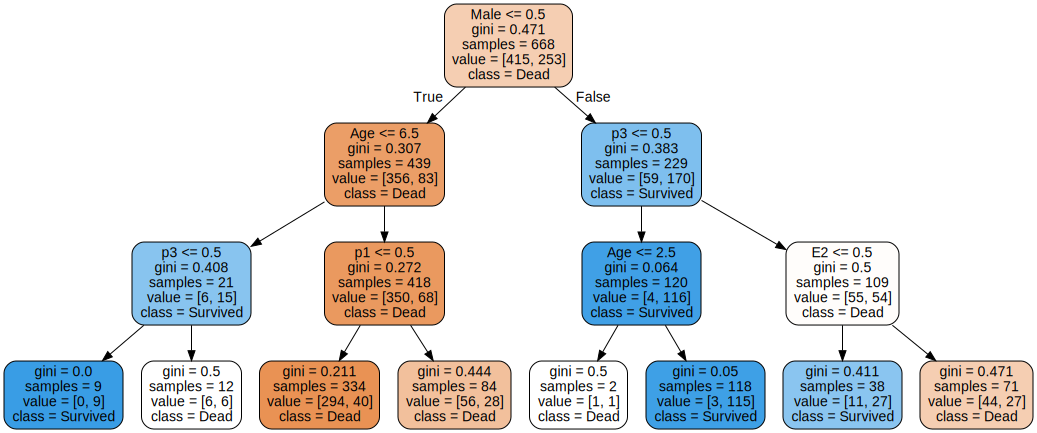

In [40]:
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(m_tree, out_file=None,
                     feature_names=['p1','p2','p3','Male','Female','Age','Fare','E1','E2'], #pd.DataFrame(X_train_trans).columns
                     class_names=['Dead','Survived'],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

<h1><center>-----RandomForest-----</center></h1>


## Fit the RandomForest model on the (transformed) training data

In [41]:
m_randforest = RandomForestClassifier(
      n_estimators=100,   # number of decision trees in the forest
      max_depth=5        # depth of each tree
)

# fit on training data
m_randforest.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=5)

In [42]:
# calculate train accuracy
y_pred_train = m_randforest.predict(X_train_trans)
accuracy_score(y_train, y_pred_train)

0.8413173652694611

In [43]:
# take a look at the probabilities 
pd.DataFrame(m_randforest.predict_proba(X_train_trans), columns=m_randforest.classes_)

,0,1
0,0.728233,0.271767
1,0.854078,0.145922
2,0.062289,0.937711
3,0.870518,0.129482
4,0.228272,0.771728
...,...,...
663,0.581939,0.418061
664,0.728233,0.271767
665,0.894023,0.105977
666,0.065501,0.934499


In [44]:
accuracy_score(y_train, y_pred_train)

0.8413173652694611

## Evaluate RandomForest model on the (transformed) validation data

In [45]:
# transform the test data
X_test_trans = fe.transform(X_test)

# calculate predictions with the transformed test data
y_pred_test = m_randforest.predict(X_test_trans)

# calculate an accuracy score
accuracy_score(y_test, y_pred_test)

0.8071748878923767

## Confusion Matrix

In [46]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[120,  14],
       [ 29,  60]])

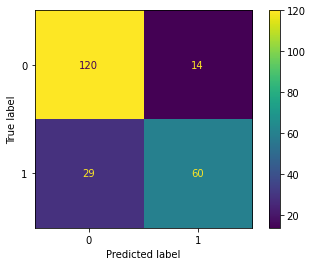

In [47]:
metrics.plot_confusion_matrix(m_randforest, X_test_trans, y_test)

In [48]:
print('accuracy:    ', metrics.accuracy_score(y_test, y_pred_test))
print('precision:   ', metrics.precision_score(y_test, y_pred_test))
print('recall:      ', metrics.recall_score(y_test, y_pred_test))

accuracy:     0.8071748878923767
precision:    0.8108108108108109
recall:       0.6741573033707865


In [49]:
acc_randfor = metrics.accuracy_score(y_test, y_pred_test)
pre_randfor = metrics.precision_score(y_test, y_pred_test)
rec_randfor = metrics.recall_score(y_test, y_pred_test)

## Comparing scores of different models

In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest'],
    'Accuracy': [acc_logreg, acc_tree, acc_randfor],
    'Precision': [pre_logreg, pre_tree, pre_randfor],
    'Recall': [rec_logreg, rec_tree, rec_randfor]
})
models = models.sort_values(by='Accuracy', ascending=False)
models

,Model,Accuracy,Precision,Recall
1,Decision Tree,0.811659,0.840580,0.651685
2,Random Forest,0.807175,0.810811,0.674157
0,Logistic Regression,0.784753,0.730337,0.730337


## Testing on Titanic Test Data

In [ ]:
test = pd.read_csv('./data/test.csv', index_col=0)

In [ ]:
test.head()

In [ ]:
X_ktest = test[['Pclass','Sex','Age','Fare','Embarked']]

In [ ]:
# transform the training data
X_ktest_trans = fe.transform(X_ktest)
pd.DataFrame(X_ktest_trans)

In [ ]:
prediction = m_randforest.predict(X_ktest_trans)

In [ ]:
prediction.shape

In [ ]:
my_kaggle_prediction = pd.DataFrame({'PassengerId': test.index, 'Survived': prediction}, index=None)
my_kaggle_prediction

In [ ]:
my_kaggle_prediction.to_csv('./data/my_kaggle_prediction_RandomForest.csv',index=False)